# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [76]:
import pandas as pd


df = pd.read_csv('data/human_body_temperature.csv')
df[df.gender=='F'].shape

(65, 3)

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats.mstats as mst
import scipy.stats as stats

numpy = np

%matplotlib inline



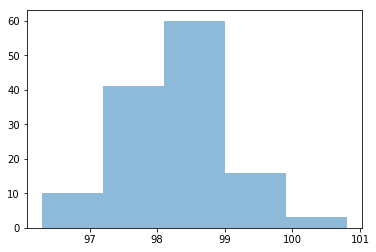

In [5]:
fig,ax = plt.subplots()
H =  ax.hist(df['temperature'], bins=5, alpha=.5, histtype='stepfilled')



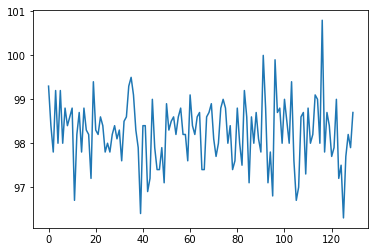

In [6]:
y = plt.plot(df['temperature'])
y

In [7]:
sample_mean = df['temperature'].mean()
sample_mean


98.24923076923078

In [8]:
z = mst.normaltest(df['temperature'])
z

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [50]:
temp = df['temperature']

<h1>Question 3</h1>
<p1>sample size > 30, so z-test is appropriate </p1>

In [51]:
df.groupby('gender').mean()
#will want to look at the difference in means, and plot it against a null hypothesis that there is no difference
#then plot the difference in sample means distribution where the mean is equal to 0, and see how far away our mean is

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


<h1>Question 2</h1>
<p1>Part 1: The sample size is large enough to use a Z Table for our tests (130 > 30) </p1>
<p2>Part 2: The observations are independent from one another </p2>

<h3> Question 5 </h3>
<p1> We will be using a difference in means hypothesis test for this experiment </p1>

In [198]:
#pandas by default returns the sample standard deviation, i.e. denom is (sqrt(n-1))
samp_std = temp.std()
#estimating with sample std
samp_dist_mean_samp_mean = samp_std/np.sqrt(130)
samp_dist_mean_samp_mean


0.06430441683789101

In [28]:
###what is the probability that the true population mean is actually 98.6
###can also check - h0: the 

In [114]:
###what is the likilihood that our sampled mean is within """""" of the population mean...
z_score =stats.norm.ppf(.975)
z_score
###the variance of our sampling distribution is equal to the sum of each of these sampling distributions (x1, x2)
##each variance of the sampling distribution is equal to the variance of the population distribution (x1, x2, etc)
##divided by the size of the sample (x1, x2, etc)
#### WE DON'T KNOW THE VARIANCE OF THE POPULATION DISTRIBUTION
### WE CAN REPLACE THEM WITH THE SAMPLE VARIANCES FOR EACH SAMPLED DISTRIBUTION, BECAUSE N > 30
## The sample variance will be the sample_std of each population, squared
sample_dist_std = np.sqrt((male_temp_samp_std/ male_n) + (female_temp_samp_std/female_n))     #sum of
_conf_interval = (-z_score*sample_dist_std, z_score*sample_dist_std)
_distance = z_score*sample_dist_std
_distance
plus_minus(diff_in_means, _distance)
#95% chance that the true mean is within z_score*sample_dist_std of the sampled mean
####95% chance that the true difference in means is within z_score*sample_dist_std of the sampled difference in means

(-0.0027207302320931825, 0.58118226869354717)

In [194]:
z_prob = stats.norm.ppf(.95)
dist_from_mean=z_prob*samp_dist_mean_samp_mean
dist_from_mean

0.10577135326480434

In [195]:
###h0: The true mean of the population is 98.6 
###h1: The true population mean is not 98.6
###Assume that the true mean of the population is 98.6 ==> If the probability of the true population mean being 
### 98.6 is less than 5% [P(population_mean | h0) < 5%], then we reject the null hypothesis

In [196]:
diff_in_means =abs(female_temp_samp_mean - male_temp_samp_mean)

diff_in_means

0.289230769230727

In [197]:
### we have confidence that there is a 95% 'chance'/probability/something that the mean of the population is 
###between 98.143... and 98.355..
def plus_minus(sample_mean, interval):
    return (sample_mean-interval, sample_mean + interval)


plus_minus(sample_mean, dist_from_mean)

(98.143459415965978, 98.355002122495577)

In [95]:
male_df = df[df.gender=='M']
male_n = male_df.shape[0]
male_temp_samp_std = male_df['temperature'].std()
male_temp_samp_mean = male_df['temperature'].mean()



In [102]:
female_df = df[df.gender=='F']
female_n = female_df.shape[0]
female_temp_samp_std = female_df['temperature'].std()
female_temp_samp_mean = female_df['temperature'].mean()

In [110]:
###h0: There is no difference in means of men and women; i.e. mean(P1)-mean(P2) == 0
###h1: There is a difference in means; mean(P1) != mean(P2); mean(P1)-mean(P2) != 0



#probably going to randomize and take two halves

#OR find an interval in which there is a 95% chance (confident at least) that the true mean falls within

sample_dist_std

0.14895758379526172

In [175]:

class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = numpy.array([self.TestStatistic(self.RunModel())
                                       for _ in range(iters)])
        #print self.test_stats
        #print self.actual
        count = sum(self.test_stats >= self.actual)
        
        """print count
        print iters
        print int(count)/int(iters)"""
        
        return float(count) / float(iters)

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = pyplot.hist(ht.test_stats, color=COLOR4)
        pyplot.vlines(self.actual, 0, max(ys), linewidth=3, color='0.8')
        pyplot.xlabel('test statistic')
        pyplot.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant
        """
        raise UnimplementedMethodException()
    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()




class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    
    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


In [172]:
data = (male_df['temperature'], female_df['temperature'])
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute temp difference ')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means permute temp difference 
('p-value =', 0.028)
('actual =', 0.289230769230727)
('ts max =', 0.47076923076923549)


In [167]:
#list(male_df['temperature'])

In [190]:
###Margin of error
sample_mean
approx_pop_std = temp.std()/np.sqrt(temp.shape[0])
margin_of_error = approx_pop_std*2 #two standard deviations
### ^^^ Not EXACTLY 95%. it's an approximate, but two standard deviations is closer to 95.4

plus_minus(sample_mean, margin_of_error)

(98.120621935554993, 98.377839602906562)